# Bringing GraphView graphics to bash

The metakernels provide %dot and %%dot magics to invoke GraphViz graphics:

In [1]:
%dot graph A { a->b };

We can extend the kernel to allow to pipe to a function to get the same functionality, dynamically ...

In [ ]:
echo "graph A { a->b };" | pydot

In [ ]:
# TODO: do you expect a file or text here (or adapt?)

pydot "graph A { a->b };"

No such INPUT_FILE <<graph>>
^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


In [3]:
echo "digraph G { 
        a; 
        b; 
        c -> d; 
        a -> c; 
}" | pydot

In [4]:
{
    echo "digraph G {  rankdir=LR;  //Rank Direction Left to Right";

    LAST=""
    for NODE in a b c d e f g; do
        if [ -z "$LAST" ]; then
            echo "$NODE;"
        else
            echo "$NODE -> $LAST;"
        fi
        LAST=$NODE
    done
    
    echo "}"
} | pydot

In [5]:
echo 'digraph graphname {
                T [label="Parent" color=Blue, fontcolor=Red, fontsize=24]      // node T
                P [label="Child" color=Blue, fontcolor=Red, fontsize=24, shape=box, style=filled, fillcolor=yellow]  // node P

                T->P [label="  Instructions", fontcolor=darkgreen] // edge T->P
}' | pydot

In [6]:
echo 'digraph G { 
        bgcolor=azure; 
        node [shape=box, color=lightblue2, style=filled]; 
        edge [arrowsize=2, color=gold]; 
        "zero" -> "dix" [color=purple]; 
        "un" -> "dix"; 
        "zero" -> "vingt"; 
        "deux" -> "vingt"; 
        "zero" [shape=circle, color=thistle1, fontcolor=purple]; 
}' | pydot

In [ ]:
rm -rf /tmp/findtest

mkdir -p /tmp/findtest/
touch /tmp/findtest/file1
mkdir /tmp/findtest/dir1
  touch /tmp/findtest/dir1/file1
  touch /tmp/findtest/dir1/file2
  touch /tmp/findtest/dir1/file3
mkdir /tmp/findtest/dir2
  touch /tmp/findtest/dir2/file1
  touch /tmp/findtest/dir2/file2

source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc
find /tmp/findtest | pydot_show_filetree

C:\Progs\Anaconda3\python.exe: can't open file '/tmp/metakernel_bash_kernel/pydot_show_filetree.py': [Errno 2] No such file or directory
^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


In [8]:
reread_user_metakernelrc

[Tue, Jun 21, 2016 1:22:25 PM] Sourcing <</home/mjbright/.metakernelrc>>

In [9]:
reread_metakernelrc

[Tue, Jun 21, 2016 1:22:25 PM] Sourcing <</home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc>>

# Javascript

In [10]:
echo "window.alert('hello world - via \"window.alert() | js\"')" | js

<IPython.core.display.Javascript object>

In [11]:
%javascript console.log("Print in the browser console - via \"%javascript magic (console.log)\"")
%javascript window.alert("Show this popup - via \"%javascript magic (alert())\"")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Python

In [8]:
echo "import sys; print('hello world from Python v{}.{}.{}({})'.format(sys.version_info[0],sys.version_info[1],sys.version_info[2],sys.version_info[3]))" | PYTHON

hello world from Python v3.5.1(final)


# HTML

In [13]:
echo "<h1>An html header <!-- A comment --></h1>" | html

In [14]:
echo "<h1>A table <!-- A comment --></h1>
<table><tr><th>col1</th>
<th>col2</th>
<th>col3</th>
<th>col4</th>
</tr>
<tr><td>val1</td>
    <td>val2</td>
    <td>val3</td>
    <td>val4</td>
</tr>
<tr><td>valu1</td>
    <td>value2</td>
    <td>value3</td>
    <td>val4</td>
</tr></table>" | html

col1,col2,col3,col4
val1,val2,val3,val4
valu1,value2,value3,val4


# Graphics

Below data and initial csv_linechart copied/adapted from one of [d3noobs blocks](http://bl.ocks.org/d3noob) here:
 http://bl.ocks.org/d3noob/b3ff6ae1c120eea654b5

In [15]:
%%file data.csv
xValue,yValue
1,10
2,20
3,30
4,20
5,10
6,0

Created file 'C:\tools\cygwin\home\mjbright\src\git\GIT_mjbright\jupyter-for-everything-else\Demos\data.csv'.


In [16]:
%%file date_trend.csv
date,yValue
1-May-12,58.13
30-Apr-12,53.98
27-Apr-12,67.00
26-Apr-12,89.70
25-Apr-12,99.00
24-Apr-12,130.28
23-Apr-12,166.70
20-Apr-12,234.98
19-Apr-12,345.44
18-Apr-12,443.34
17-Apr-12,543.70
16-Apr-12,580.13
13-Apr-12,605.23
12-Apr-12,622.77
11-Apr-12,626.20
10-Apr-12,628.44
9-Apr-12,636.23
5-Apr-12,633.68
4-Apr-12,624.31
3-Apr-12,629.32
2-Apr-12,618.63
30-Mar-12,599.55
29-Mar-12,609.86
28-Mar-12,617.62
27-Mar-12,614.48
26-Mar-12,606.98

Created file 'C:\tools\cygwin\home\mjbright\src\git\GIT_mjbright\jupyter-for-everything-else\Demos\date_trend.csv'.


How about displaying that csv data in d3.js, called from a bash function?

In [17]:
csv_date_linechart date_trend.csv

In [18]:
cat data.csv | csv_linechart

In [19]:
du -s * | sort -n | awk 'BEGIN { print "xValue,yValue"; }; { print $1","$2; }'

xValue,yValue
1,data.csv
1,date_trend.csv
1,disk_usage.csv
1,pop_age.csv
1,test.dot
1,testfile
4,Demo_0_INDEX.ipynb
6,tmp
8,test.png
24,example1_graph.png
32,Demo_Perl6-1liners.ipynb
368,Demo_Metakernel_Bash.ipynb

In [20]:
%%file pop_age.csv
age,population
<5,2704659
5-13,4499890
14-17,2159981
18-24,3853788
25-44,14106543
45-64,8819342
>65,612463

Created file 'C:\tools\cygwin\home\mjbright\src\git\GIT_mjbright\jupyter-for-everything-else\Demos\pop_age.csv'.


In [21]:
ls -altr *.csv

-rw-r--r-- 1 mjbright Domain Users 183 Jun 20 22:08 disk_usage.csv
-rwxr-xr-x 1 mjbright Domain Users  48 Jun 21 13:22 data.csv
-rwxr-xr-x 1 mjbright Domain Users 468 Jun 21 13:22 date_trend.csv
-rwxr-xr-x 1 mjbright Domain Users 113 Jun 21 13:22 pop_age.csv

In [22]:
%%html
<script src="http://d3js.org/d3.v3.min.js"></script>
<script src="js/d3.v3.min.js"></script>

In [23]:
# May need to run more than once to download d3

csv_d3piechart_0 pop_age.csv

In [24]:
(echo "item,value"; du -s * | sort -nr | head -10 | awk '{ print $2","$1;}') > disk_usage.csv

In [25]:
cat disk_usage.csv

item,value
Demo_Metakernel_Bash.ipynb,368
Demo_Perl6-1liners.ipynb,32
example1_graph.png,24
tmp,11
test.png,8
Demo_0_INDEX.ipynb,4
testfile,1
test.dot,1
pop_age.csv,1
disk_usage.csv,1

In [26]:
csv_d3piechart disk_usage.csv

# Using Lightning Visualization

## From Python (from metakernel_bash)

In [27]:
%%python

import IPython
from lightning import Lightning
lgn = Lightning(host="http://public.lightning-viz.org")

from numpy import random
viz=lgn.line(random.random(100))

html=viz.get_html()

# NOTE: use of retval makes this html displayable:
retval=IPython.display.HTML(html)

Lightning initialized
Connected to server at http://public.lightning-viz.org


In [28]:
%%python

from lightning import Lightning
from numpy import random, asarray

lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
#lgn = Lightning(ipython=False, host='http://public.lightning-viz.org')

series = random.randn(5, 50)

op = lgn.line(series)
#print(op)
#retval=op
import IPython
retval=IPython.display.HTML(op.get_html())

<IPython.core.display.HTML object>
Connected to server at http://public.lightning-viz.org
<IPython.core.display.Javascript object>


## From a bash function:

In [1]:
lightning_line_test | html

In [30]:
type csv_linechart

d.yValue; })]);

    // Add the valueline path.
    svg.append("path")
    csv_linechart is a function
csv_linechart () 
{ 
    echo "Invoked ${FUNCNAME[0]} $*" 1>&2;
    getinput_src "${FUNCNAME[0]}" "$1";
    [ ! -d tmp ] && mkdir -p tmp;
    cp $TMPFILE ./tmp/;
    TMPFILE=tmp/${TMPFILE##*/};
    echo "csv_linechart: data file=$TMPFILE";
    HTMLSCRIPT=${ROOT_PATH_PREFIX}$TMPDIR/${FUNCNAME[0]}.html;
    cat  > $HTMLSCRIPT <<EOF
<!DOCTYPE html>
<meta charset="utf-8">
<style> /* set the CSS */

body { font: 12px Arial;}

path { 
    stroke: steelblue;
    stroke-width: 2;
    fill: none;
}

.axis path,
.axis line {
    fill: none;
    stroke: grey;
    stroke-width: 1;
    shape-rendering: crispEdges;
}

</style>
<div id="myd3_linechart">

<!-- load the d3.js library -->    
<script src="http://d3js.org/d3.v3.min.js"></script>

<script>

// Set the dimensions of the canvas / graph
var margin = {top: 30, right: 20, bottom: 30, left: 50},
    width = 600 - margin.left - margin.right,
  

# Using Bokeh Visualization

## From Python (from metakernel_bash)

In [31]:
%%python

from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

plot = figure()
plot.circle([1,2], [3,4])

html = file_html(plot, CDN, "my plot")
#DONT PRINT - this crashes the browser tab: print(html)

import IPython
retval=IPython.display.HTML(html)

In [32]:
%%python

from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.resources import CDN
from bokeh.embed import file_html


x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

html = file_html(p, CDN, "my 2nd plot")
#DONT PRINT - this crashes the browser tab: print(html)

import IPython
retval=IPython.display.HTML(html)

In [33]:
%%python

from bokeh.plotting import *
from numpy import pi

# define starts/ends for wedges from percentages of a circle
percents = [0, 0.3, 0.4, 0.6, 0.9, 1]
starts = [p*2*pi for p in percents[:-1]]
ends = [p*2*pi for p in percents[1:]]

# a color for each pie piece
colors = ["red", "green", "blue", "orange", "yellow"]

p = figure(x_range=(-1,1), y_range=(-1,1))

p.wedge(x=0, y=0, radius=1, start_angle=starts, end_angle=ends, color=colors)

# display/save everything  
output_file("pie.html")
#show(p)

html = file_html(p, CDN, "my pie-chart plot")
#DONT PRINT - this crashes the browser tab: print(html)



import IPython
retval=IPython.display.HTML(html)

In [34]:
ls -altr | tail -3

-rwxr-xr-x  1 mjbright Domain Users    113 Jun 21 13:22 pop_age.csv
-rw-r--r--  1 mjbright Domain Users    184 Jun 21 13:22 disk_usage.csv
drwxr-xr-x+ 1 mjbright Domain Users      0 Jun 21 13:22 tmp

In [35]:
%%python

from bokeh.charts import Donut, output_file, show

#output_file('donut.html')

# prepare the data
data = [[2., 5., 3.], [4., 1., 4.], [6., 4., 3.]]

donut = Donut(data, ['cpu1', 'cpu2', 'cpu3'])

#show(donut)

#html = file_html(donut, CDN, "my donut plot")
#DONT PRINT - this crashes the browser tab: print(html)

#import IPython
#retval=IPython.display.HTML(html)

Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\python_magic.py", line 19, in exec_code
    exec(code, env)
  File "<string>", line 8, in <module>
  File "C:\Progs\Anaconda3\lib\site-packages\bokeh\charts\builders\donut_builder.py", line 114, in Donut
    chart = create_and_build(DonutBuilder, data, **kw)
  File "C:\Progs\Anaconda3\lib\site-packages\bokeh\charts\builder.py", line 62, in create_and_build
    builder = builder_class(*data, **builder_kws)
  File "C:\Progs\Anaconda3\lib\site-packages\bokeh\charts\builder.py", line 282, in __init__
    attributes = self._setup_attrs(data, kws)
  File "C:\Progs\Anaconda3\lib\site-packages\bokeh\charts\builder.py", line 333, in _setup_attrs
    attributes[attr_name].setup(data=source, columns=attr)
  File "C:\Progs\Anaconda3\lib\site-packages\bokeh\charts\attributes.py", line 195, in setup
    self.set_columns(columns)
  File "C:\Progs\Anaconda3\lib\site-packages\bo

## From a bash function:

In [2]:
bokeh_line_test|html

In [37]:
test_html_table|html

In [38]:
#{bokeh_piechart_test;test_html_table}|html
test_html_table|html

In [39]:
(bokeh_piechart_test;test_html_table)|html

In [40]:
(bokeh_piechart_test;test_html_table;)|html

In [ ]:
#output_notebook()

#from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

#plot = figure()
#plot.circle([1,2], [3,4])

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

html = file_html(r, CDN, "my plot")

import IPython
retval=IPython.display.HTML(html)

In [ ]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()
    
show(p)

In [43]:
%%python

#from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_notebook, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
#output_file("lines.html", title="line plot example")
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
#hdl = show(p, browser=None)
#p
#show

In [44]:
%%python

from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb

In [45]:
%%python
from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb


print(1)


1


# The End ...

# Displaying Images

In [3]:
wget -O test.png http://localhost:8888/files/node_modules/hawk/images/hawk.png

--2016-06-21 13:25:15--  http://localhost:8888/files/node_modules/hawk/images/hawk.png
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8888... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘test.png’

     0K ......                                                  163M=0s

2016-06-21 13:25:15 (163 MB/s) - ‘test.png’ saved [6945]

In [4]:
ls -al test.png

-rw-r--r-- 1 mjbright Domain Users 6945 Jun 21 13:25 test.png

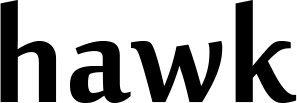

In [5]:
display test.png

In [ ]:
display < test.png

In [ ]:
cat test.png | display

In [ ]:
display http://thesuntoday.wpengine.netdna-cdn.com/wp-content/uploads/2011/04/Sun-April62011.001.001.png

In [ ]:
display 'http://images6.fanpop.com/image/photos/38500000/beautiful-wallpaper-2-beautiful-pictures-38538867-2560-1600.jpg'

# Experimenting with templates

In [ ]:
type test_alert_js

In [ ]:
test_alert_js "BE WARNED" "ignored arguments"

In [ ]:
ls -altr *.csv

In [ ]:
date +%s

In [ ]:
type csv_d3piechart

In [ ]:
type csv_d3piechart_0

In [ ]:
csv_d3piechart_0 pop_age.csv

In [ ]:
du -a * | sort -nr | head -4 | awk 'BEGIN { print "item,value";}; { print $2","$1;}' > du.csv

In [ ]:
source ~/.metakernelrc

In [ ]:
DU_MAX=10 du_d3piechart -a

In [ ]:
du_d3piechart -a

In [ ]:
du_d3piechart -s *

In [ ]:
DU_MAX=4 du_d3piechart -s *

In [ ]:
du -a * | sort -nr | head -4 | awk 'BEGIN { print "item,value";}; { print $2","$1;}' | csv_d3piechart

In [ ]:
csv_d3piechart du.csv

In [ ]:
cat disk_usage.csv

In [ ]:
csv_d3piechart disk_usage.csv

In [ ]:
test_piechart_js disk_usage.csv

In [ ]:
source /home/mjbright/src/git/GIT_mjbright/metakernel/metakernel_bash/metakernelrc
du -s /tmp/* | pydot_show_du

# Images


In [ ]:
display 'http://images6.fanpop.com/image/photos/38500000/beautiful-wallpaper-2-beautiful-pictures-38538867-2560-1600.jpg'

In [ ]:
display 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGRgaGBcYGBgaHxcYGhsZGBcYHRgbHSggGxolGxgXIjEiJSkrLi4vGB8zODMtNygtLisBCgoKDg0OGxAQGy0lICUvLS8tLy8tLS0tLS0tLS0tLS8vLS0tLS0tLS0tLS0tLS0tLS0tLS0uLS0tLS0tLS0tLf/AABEIAKgBLAMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHAQj/xABAEAABAgQEAwYFAgUDAwQDAAABAhEAAyExBAUSQVFhcQYTIoGRoTKxwdHwQuEUFSNS8QdykmKCokOywtIWJDP/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALxEAAgIBBAECBAYBBQAAAAAAAAECEQMEEiExQSJRE2Fx8BQygaGx0ZEFQmLB4f/aAAwDAQACEQMRAD8A5tpBiHEYZJFa/m8bCW9U+nGPAkD4kkA/Whryj64mPJOWpUDUjkNjt13hxLwjADhAmWitapCqeQatOUNZc51BPH36eUL4XRoOmURBWXJZUwKDgpQK1/ve8Hy5AiSVhAHYXvC3M0W4zLkqBCFFJNtwPI9Ijw2EBLCXV2Labs4U5IeoBeHRwT2jQyFJLp+Ie/KM3nFRzTKJqUhSgCdTMB4iHu4HiO3KNJeICFgfAlSWUCEq06npuRUVBAozw4GX4iZMM5TA1uSAkA1HEirjizRvNyYMkJeZqU7Uqk+FagVfCbbv0eG710zAebj58ogEBY8LGtdTfq4O4BPnWLVgU6kJUUsTteF2QYBUtc1C3UlOnSTUEOSKGxD7MKQ/TMDxPlkukaio4jJT/F6H8BQFE0ctsUhgQ6d6RYc8yxJR3SQ8xKVFLUYmhINnrQD2g+ZgtS5cxOkKSSHIJ8JbUBzoLxvm+CM0ACYUgBTs41OKVBoxgXkto6hF2dy0ISXl6VkJ1kWJHyNa8a3rHuI7OSNCvCAW+M1rsSN/3MO8nwhlSkoJJLB32JFQOTvAuMxyRNMssUUcpckF2Ltare8HdsJL2KbnGSJliUlIKmS6iWDanIJFKuHY1pAOOycy5eoaUhg6iSSmr0etS+24rFvzHLJU1ClJIJAbxn4GOwNqWLPQQrzDLpRlBfeFayEkAgl67c6jkD1ifPhTt1+5ZippIpyPHNIJKkqIKlFLVFRQW4NvDmRlgMuadJ1IYhSh8fAAG3lyEOsmyB1LUuWdSh4Aw/p8zwNCPI84PwxVJmBCgVBg7bbClnqeHGE6fD6bn5+//QpYnFteV/BS5WBK9DgpKiyiASFfqdxXXanMRNmOFKChBSzrp8SqAgkVvtt12iy5pi0atKk0YEAEULtqSWFQz0JvCeXmajNS6tRTLaVSjFws7eJgw6Qv8PhhKnK3/Qe6W3hdi3FZQZkrXZf6Ukt4QKM9DbrD/s9gVo0gywzklW4LUDgsSKgtvwaE+JlqVNPejUSsJooDQxBfVuGTWlKdIf4SVMCCmUQlCRzJYHxDUdy7vvtDsCgpNoRktjSbPSgEqLAX9HimZ/nfetYyiSyQSFUFybB3tXeLXj8AqXIKZQKtQZTspgxDAUfbyEUrA5FMmlglVSwJAFgVF/IDhtFUm/BPQvOqYoKXqIDAliaCgAPmPwxHNRQqA0gnwgtYvtd4scpCEJ7oLQos8wBGpikVqzMPDuBc9E2Y4YkqUVFQFdTgg7gEigOzRFqE1Gw4xFS5hKtRL+XC1B5RKMQVBlVD8noOPnaNpGFWv4UkgX2pzOwoYmXKSlGpyDqYJ3DVc+os+/CIUpdhUwRVFGlOBa3MDfpEq5ZWCQAyQSwegHXqIfZdlZXKK0KBmBhUAuLuoFwKfOI5uXICFhZJWo1IPHSTvpIB+T7Q5YJVfhm7QCRhkmTVQBukEHxUq35wjdEpCAVKLWISbkFykhjZ2oeUZLzIqlplaEkJd1AtTYvt9YGBS/8AVJLWYClwN32twaNlkjGq54NUUwuZnCtBQgAFRdSh8RUaq5sLDpCtSACCXZ6vc82/HaCZs1OkBKAndyqp526RomTqFXKi5u9g4cetY55Hkrc7/gBx9iSRhysgUZqOeXB7xtOwYeh2HTycu0EyJJCErC6t4Q7aSTf577iAVpBO21yeFduMejBx28qxcotDOWkhlB+bVv0gibMCwWvSnOw94VYbFlO1IYoxCCtBDs4dwasCr2IimOaE1wwHFob4XDNLA1bV62PSvziSQoFyoU2H1HAHi5gWVNSt1FTIexuo222+Z9ze5KwdT6f7QWPUm/C3vBmBuUTStAOznzqYbS5iXAJqbQsyKSnuUEOHSmoP5xjZZHfEay6U0FGKlVq52AH/AC6QmStm0WBCBEgw4MUZGdLCyQdKiW07cHoOQhplHaIqrMFNSUvShL3/ADaA2m7WWSdgh+4gZGCSFlddRAF6AANRNv8AJgRHaRNlCjkP0LEsQ44wfIxiSygXBsY6mc0SGVHicO8ESMekqCaV61jMRixr7sBiXZjy+bt6mAaZlGsuURG4RB5QCpn29eH51jJuBIMBZ1EMiXGuNwCVoLpdmPNx84nFNoIlrA84bE3plD7tCVVEzQLpWhk3/uS7eldVzGi5QWuWZA//AKAOA7Ap8RHsD5Rc8zwEuagptc3IBUQzlusVc4EyFSyjvAWWVNSwBOnZudYRkjJeOPfz+h6GKUZdPn28EktRwyHXM8av0q2JNL7XHGMlYo6hMU3idJCN1BnLlwdhS0K8HiFTFaUpDvqclykOwclwAw5PFmwOUzFKSpaiEpYhiCCdyEswoGsKGnGFYc0p04flVFObHGN72rf34E03L1INJOoKNNIAsSRQF3KXfyNIUZ3gZap2HQkEkjSoJKdRZJLkN4WLguLDjHS8WtKEFSmASK9IqXZuScROXi17DRLHAfqV51H/ACil4oOW1+SX40nEhyXDB096xmJSUAHYXUDTd/8AxhliMtTMU5FCCFDYgj5u340MlSZcsh6EjTvYmj+YicSa0h8YpR2k83zaF2Ey/QlnJHPnU+8aY2WhLAoKlHVpCUubMSDYFjd4fCTSOX9r8ZNVilS5KlKv8BJagBFNgRyrANiwnFZVKQSZiwVEFJAdZMt1H9INVEpUXtttEM3C4dIXrKUlaElrEEHwjSl/DYu7l4V4TK5gSuZMmJlaAG1OSXNClqioItxhPPwM1R1JJWkHSlTu5AdgONLQnI6XKDi34NMZikjwylKID8hppRg9q1JiLDp1gpoDcruw4O9mflSC5mVplkhailYSCUtVizUNKvZ9rViEqVqKkpKklQ8LaUqZm1JFzyBjyZvnn/A9Rads2yzHzkOiXZe5Q5Y0cD5CIZkpTLSVsAWYAkFTtV6i5NuMGYjCqBBWtGt2IJI7sVIY7B3FeHnEOJeePBKSEpU2sBVaAAElyTR/OD3Sa2+3g5woUzPCaHl1HHzgqViSlJZY8QY/Ku4ADwyR2erLGsEq+IJ8Tb7Wcc6QqxQAUU6QNLh9y297wuUZR5YG1x5N8PN0F/CWcODxoSHHDeDcFj2cskEjTYcw2sijirvtCdxw/OPWPNJaMUqOjka6CzPYBJFLvxfZ4gmEPQMPMxFyjHEOWdinyES1v1gvBzdJSxsp2IcWIevW0RSJNf8APrBExDhJFgRW21z0hUMsk7i+SuOL0+pDbD6VqSANOmhUf7tupuepEOJCNJGtyl2d97Pdq+UV+XMamk0uSK9eZ5wzGOQtGlSQTevow9vSPS0+vi7UuzMuka5Q4weIlpw6DqIKUAsCDs9j9IVzAtYDpLhRKlPStFJ0uASnjyhZKGoSwCoEs5d6JPiZ3banziz4OQW06ksHDFgAGd61faK8eRZehEsW3kQYfCf1UpIGpJYkAssEeFY2r9IlwaFaXUohKFsNyVBPhIrRuXGGGbZeQElQDJYAjgC4DGrX9eUK8bPs7mtamp9Y83U6tYsnw0nZZp9NvjvfR6rxLck1YEuXBJ1K0gXJ58of5ZnQSBLKGAJq9wag9d2isIX+q1Ku4cmnG0ZNxK5jsD3b/CAHYb6gOtzvvGYNXKqfaOz6aKarplwmY1Da0mhALkMWLsQwDBxuI0w+PKSFKbUztWhCVAbXLtFfkYrSQpSCUhikCjkMKPtQU3glU/vRqNFBisVdqU2q49+Yj045IyR58sddFwl5j46JNN63L3Hp78otWAzR1aSnzO/Xhx845zh5hSRqGlmAB/UTQqZy58XveHmW48oUFrNSosbNdx1FfMxk4JgUXqfg9VQkQN/LTHuU5vrTVgXs4O5H0hmFBVjCN0ocG0LP4Boq3auRODzZNVSwRoKfjBYr0niw4cd4u82Uwd4WYl2NHp0hkJbuw48Mq3ZiXKWELSkArBUEgOkClzxFacSbtFll4iXqKUlyCaM3VjY823vFSRik5fiVuP8A9ecp6f8AozP1U/sPL/Jua5hqL6pak6dSakMHAd9TAubitA0BJrFH5FVPJLkD7bZmFS0SJVVzmU9GQh7n8sDC9GMSEhGHctoBCW1saa6s54jm78KricWrvW1AaWSFV2LegD+0WDLsakO8pJJYhaUuQ1NWolmPGhtwjzpapzyU0l/JTDD6eBijE4kp1IK0pGlOpSQ5ADjws6nD0obdIZSM/aXL/vJIUVA2DuaWJ58DAuTa56gjSAlIoCAoq2JJd2YkBqCu4i4ZdlKCokoWgskctKSRp4EFrNaKMM5VdiM0YxdNAiccmfJm90CaKSCNQelGLO9dooGcyBhJiikq74pLlhpYkUe5o9DyfhHX8XKEtB7uW7JJDMEghqFqgVJcA0Bjkef4ebqJWhkqU4UX5qDj9Jtetg14pxzsiaK+lRWFhRSiUAGRUBRVUEl7gkvwJNKRBjcxlaGlooP1aEmoDMxDBJ43cehU6QmYADrUpgzgHXtp4J8/eI5GXqU6H03UALBqE1YPRn6RmomtoeJO+BL45y9RJD1cgndn3J6kxNLQonwsGUPHtX4T/tsahjeCJqEp1B1OGASaggOS7cmoOJjJmLmFAAUpRLsGI0k3Yndz7x4cpU7rn78noQxp8M2/l2gqWlYmrcjSG+JguxfwBnJ6MawJPlTVqoSErdhspw5qzVI6xNixMQPChgG/6jUAEGjF2/HgydgJhkpVNmaWYJSCE7OSePNQEH8S1x18jljt0BT5glhSNKmcVC3003UPCbi3LhCYSNTaQq9XqG439obY+XKSB3TLIqSxUE8iTRXF+nSI5XhalVVrW27NblSFyyexk8LbpgOIQlLBIdiXoQ/nEIl1dTtT/LGGUyQouVMo8BQB923hbOlNenKjtGRlYnJGndECqRGYnEgmwjQo5QyyZxYyk1sfP5X2goXTxcW5b9YzDYYn6O30rBkuXyfpEkslPg+k0+mk4qzJE9ySqpo9LD6bVjRaAVXYENRuR35PzpE05DMWHMOLGj24P6RJJlh3alf0sduMd8dvlj5aarh7fwD4XDkEWJCaM7eLieg2hzhJswCo8JLAJ00I3Yn/AKeJtC/DGWKs7kUNHFOFjs0MMKnvHSnbUQC71J02NwARUesXaTPJNpP6Ij1Gmgop1fv9/aJcZMSpNVm7EFIZ60AFeO+9oT/w7AP4jqIYV5g9aivODp2ELuzkUI0szca8eD3hVNmeJ6sS/ny4s8Fnm5epq37kyUY+lcfIjKAyQQfTSGeu1faJ1y2SAvSlJchi5IpsklhXleIZwUoDh8IrxYCN8MlCdQITyJd/IWHmeEdimhORMLM0EgKSpRD0WWAd2JoCSQ9DG2VYdSiDfUT4Ut+nc8AHBfnBcsKTKTMUVBbggKregBYMIIwyCFDRQ6EpSACS9y7HZIBvw4xcpepX8hDjwF5gtYSSlS9QAcBKQkbkWpcGAVhSylAWvwivCrWA/wAwbhBMbSEKL83cX/uDFyDxqI3UkIkqKQACpT0qVA+ElxRgAG6wzJN3us6MI1XkbZNiFJUaagCA9C9mtxrsNovuU4zWmpGrccOUVLKpehEs+GrlxqfSxArU8v8AEO5LS0oUQoEqKaAkpuWJHNn4tBuakueyaWNp8DnMm0g6FLILjTdJYh/QmA1YqUQS9AwLg0ezv1EC/wA21MlelGpmLuDU7bHwlgdx5QlzgTATpCCQNMwpKkNQafCaB6VF6DaFOWxWOxYt72sYT5+HmK7tKBNBFSGISDfyrtxirz8rThJ/dkq7icDoDlWmYmosHKTZhu1958HPxMoBCZelSmUSTfk36duDNEPaoYnFy9KQAuX/AFApLuNIJNhwZrVaEx1UZqpJ/qiyWmlidxfH1KbkmWKnY1cgy1FSSrUlJA0BOoKqXA8ZTVzajuI65lPZeVLAJSCopAUCARtS3EXvFC/0u1rx2ImrA1LlrUoizqmIUW846xJSdxD1jgvUqJPizqrJsPhUJsADyp7wYMMWfaNMOBu0Solkm8KkxMuTXw25MX3isZ7iZRHdCQFBZZWnSVB0s7MdKmAq22zUsOb4pEgAqQouQH4kuaMDwaKxMzJcwkBHcoLmgGomwWFNxo4tSsbB3yLYszLKMWpC1aRKQQQxKQ6dvDx0hqB39ueYvKFOpStRLtQMA19XGpFufGL3mOHxE1PiXMDAVWlIYqAJBIVypR7QCjIZ0kJmSpyVlYfSbaRU6kFt+fFgq8NvjsOBSsowiCta1oWQkjTW77Va7cRR4eYKWJywvuJaU6iBdIIKTWhFiKM5J9YkyXKZcyUZ06Zp0lYSl/1PZKU+Ilqk2ZQ8ijNQ6JKZenSnSFuQ6QE30g1Le8ebqGoP1M9HBFyVoHkypRWEKVLSAtwhSCxZPiJUqYUgMRWppTZ1eKRKmBpeH1KBa1w5dQGkBiP+oW3i54/BhCNZlpISE6VOoCYwZIFAwY1O7APFPxGHOrX4hcKLEAqvQ8PtEOozRiqotx7u/BX8YorJQyUpADi2nyBZzGs5IBBAJA+nDhB6kfpcXa4677c4W4mYo0Kgwe5KgT+PCoO+ELyyk05PyaS5juxSAfzq8RGWn9KSebf5AEazAxDAvub129oxS1AAEEsNmFofXsTprpohWkhy4rYAWaItYNSCfL9xHk5bly/EXiMkcPnDUiWUlfBYpZCS6reXoREyJouEniGo2zwNgJRWNSt+gfzd4PIYEBmN2tzqYhyJJ0fS6fK3C+l2vchWhKmBckF+DecEJGmvK5YEPYO7DasQunSSE7jYXdq9DEygoOoUDPsW8vtxhfPRQpQkm/Puv19zZJ0iw8Xok0ALjlyake4PDLVq0EFjb4gXINgPysSIWCQ9Dxb6DytBGHASpmDHfr0tDMOdRklI7NpHNOeJ/oH4ZC1oCFIIFPEDpAcvUOaViv4rCFM1QCn06iCCbnr6dOMW8zAZalhQDUeymAGzbfSEOLwomT1JL6RVrEgAU8y348evqZRkoJPn/o+e2u3aEMqSpagA7JNzvcM9nqYZ4FCAf6gUmtyP1dU7OYIk4RLHwuwPmASHPNgPSJMEnSRQfFSqTWl+ItaJ45IwW7g7bJ8M3zM+Dw6iliQ7GoYjU7vRvx4zAYlICvH45hNK0BKks46O4gybPJdKgANJDJoCCGqAaVI9Y9yXCCiksVC4cigSOBDb8bQ2OqUp7oHPBxTD8vlhR1u4d23AoHYM9QLcfTec3iTodOogukJuAGrY6lfaC0YsJlSwJNdIIUCCbXu46mBZcpZK9YVUuz8UioALPwaziCz6q/T5Mx4knbGOSkDu1Uoh2BqS3LcBj6wf/NhKHiSWbWlgLks9qARX8tmnQEqYEBL8QElT8gOvEcIbY+dJnYcnUQsEXPxAnnwBPlE09W48Rav5j4YIy9UlwTHGJntqWEqIcOHKTsetQbceUVfNJsyVMDzHUGDu5IuEqFRcuKnoIYZQtCVVn6UvdibfIsGtxg7OFpeXpTLWhQUKEpCgnYpSXFWoTwjcmeWWPdNe39G4McYStdP36/yT5Xm6DJ1E6VFQSXSo6mFgQQVKJUS5IvGudrxCsNP1gSpaZKjrSkgzCK3JBAJ4uOrwt/08IGNnypgdkhaaE6WuQ+zFnNbR0DtplhmZdiAk/wDpkt/tZTN0EV77S3y8IkyNRk0vc5t/o5hJizOnBQSgMiofUT4jwt4fWOqd2evP9ooX+h6kmTPk6hqCwsJPApCSR6D2jq8rDoF2jZ6rFCTimStUvULUMNh8oLlD8Bg0SUcI2EpPAQt54sW2hacG5JJU5sTXTyD2FbRrjZKZaApRASCPCWAUX8Ie92PlDekIs9C1FJRpBS7aiGc0tua/OJ8urhjVyZ0Ib5UV3Gzps5ZlfwwJurcauKjqAADhxWFuKy/u5Cu8ElRDMhJBrv49IJ8JsKc4s/8ADTSHJZx4gFFiSXJITe1uZiXCZSlLApoBQqO9Q+kAJD3s9uMKf+q4qqI9Y4x7ZzPsdka1d+o6UJBCTRBIcmzg8GeHWeSJuHUfEhlJ0gkALIYu6ggJU73c3veHuW43D4bETkEy0lJSbXqoU9vaFfaDPZU0lgVKNlEElLbJGwrCc2tllXCZbgTjPrgrOOzSYp3VpA2LnmzPxEKFLcBRDHi4HVga7mJs2xVapcjcmp2vcnnAMs94xSgUuLeV2ZuPCPOnjn+eR60NTjSUF39/Ijm4aXV3D36cH3F4VT5KDRBYUuxIFdyKNwg+eol06X6EAAcHgJSHDISzc/TZ4djTXknzTi1UV/YumyaEjnUVcD3jMKa+J6MwPE2NDG+NnKCSrrQfUjzhbhiNLqJcvv8AR4vjjcoWzz5ZIwmqPcUQCS4d7fttA6pgP6T7faNlIBJLeW7xqZwFAn5RQoce5NLJbfNItuHkJYKKTUbqdhRhpjeYEhwpIY3o7jmaUhycGsV01PT23MCTME6vEHNDzT+fWJvw7lJuz0nrIxilXP0FiQiY6Qk0JFaV6Cke4jDqDBPicUDfJiXpDaRlqhUJZ+kEJwKzvpG9Q1P8Qp4ZqXp5X1GfioShUrT90vv9xKErSQSghzy8hz9YhQtQ+IFxbhsSTWLIMtm6noQNnfz5nnEwykLfUACQx/N2hcMUm/Uv8FOTVJpOEmvrxfzK2SVzAyvCKml/tBGGUoLJSTSgZ9ufrDyXk/dgpSASf1ezt0j1GWsGBFvffbrD3hkuI9eDypai22yu96oBVw+9nq9vONJSy4YGvl5Nf3ixHKSRUh+NftGv8l3oegb6Q78PapiPjtPgHl4nwJSoJIbo92BIuHb0jfJcamUgagFVUAAejV4UG+8FSMp0s9+heCpGCd6GnBP48Hgwyx3zZss6k+eP3IU5iyEhKaBIcUqzM9Kij1jP48nVpoKeGp/Sztbz5wWMvCQ+k+kYcES5Eo15D1gsmFzRy1KT56EffrC1VYKa/PpxJiSVOJUEgFg70u1AWpV/KC8Vlpr4SDQ1NTyf7xJIwK3+C43MLy6O0nfJ0NXVpdCqYpjVJHGh9Rb8MMJeOWtQFBpSA4DBLuT8LeIgD084KGSqNdPHdvZonwOVL1FwXJtfYNBfC2xfPIUdTbS5or+dT1yJ6MWlTkUUWDKAsClm252EWz/8ymTJOnWPEkhwA7H9ozHdlFTZRCkKL1Zh1EUrs/g1onTsLMB1IBUAzlhej8GPrBQwxzY/X3H+DZz2y9PKfuumCdj84XhsayCz60HmKn5gR0qZ2pnM/e8mA+nGOR9lcOZ+Plpb4lLLD/aomOtzOybNTnt9TCNdp8Xxk2+TsU3s/KmTS+3M3TpCw+xIDxHI7WzSr4zxudto1ldkn8RS/wDxiXD9mkuB3aqc5cKnDFtaTZsW91uK+YartlMuUhxa4p9Y1zLteFJHhCVcXf04Ruvsqk/pX6p+8E4jsbL0v/Ufdin6iJHpsMn6m39/U5ygnaihVh+2aghQqs7cj9d6Qlndo5iVuVk7kajU+Rd4s57J4ZIJmKWDwUUP5ABzC3EZHhVWE1v+wfV/aLMGk06/2ipZX4pHPsPmhXil1YEHlsD5VgxOKAmWI2ZySS4ZgYLR2OIxBmFQ01YPVuBPG0OJWTpSaAXfaPSlDH0vYVLLOXZT8xxSSzG+5v8AaIf41KUkMQohuI5U2eLn/KEi4R/xB+keJyWU9k/8U/aJcmCEo7WHjyTjLcjnc/4dJUTanLeI5kopZQBAIpxZ23jo/wDJJLuUgnon7RGns/JDuNXU+g6VhihBXwa2/c5diFqJDp/KPAs8EOkixp6x1leUyf7B+eUDTsnlGugPFEHD2J5pvycq7nwtvd4HKDwMdZOUSm+FMBzMkkv8KfT94pxuHlCZI9E2ocq9D943kpZRdVDV7QMnEkpOkiluNYEVNWTUE+0LnF8jUuUPpaRuSfOJdKQQ9HivZfOUUkJBo7ueEHoSSQ6t/WIZycG1ZTHDvVjmSgAu9IlkqDwrUkJI1FxX7/URNLnawQncsOjNC8eWUhs9PCK5LBhglRcAHYty+sb4YIUVCjAt5MT9IS5GteGmnXY1HW0T4PEHvlpFS5pxqR9Yp+H1bI21fBOQFB0u2/t94yVMQ4B477RAFqTLUOLH0JH/AMYFlKduJJL9P8R3KQO1FmlyUkAgU48d/oY3wq092CA7qP8A4hx84ri8ctmBZKA79aQRkmYaUjXUF26kA/MiCxJvs6dIt2DwUpaEhwHHu0GnJkAK8TMw9RFMlT5oSlQBIKE+VHjxOeKVrBfUW8jpb86QyWMXY1m4dKlqSKsR9o3w2GUVBk0JI9IrWV5kof1ATUj/ANym+Yix4nG6cIpayxKvABxfxH0hOTH4HwVqzeSHUQ4p9YfYfL0SluptOkedwY57lWay1L0zNWl3p0A9A5hvn2YqCZKZbsCpiTViGJPn8o5YVtthRfhHQJ06QhDsCGcAcB+0fPHbLPZK8XMnIllD30uXoz1ZnHzMdFyztD3SgTqUGZi3s8VjPkyZs5cwICUGydFRQB3HE184bi2RZjTjwmUbJM2EicJ0tSkTAolJ0AhLhiCCS4Yx2bs5/qRImpaegagPilhTK/7VW9TFGkFKaIAA5Bn9qwQnEDifaA1EYZe0FG6pnUcL2zwigPCtPVILehiZXaXCCyn/AO0/WOWIxZHMdIk/i4meCJ2xfMvec9pwoASCUl6qKRbgKwoxOdLUllzVLY8gH6NFXVjOcRrxAe5hkMUUY1XRYJmOF6x4MwivjFB2cxJLUD5w7oCh2jEEmN1TYVoUAbxv37/4BgWwlEPXPDXgUz4HVOHXygbUC7UjjqDjieZj0Twf1e8LaHeMkgG59I0GhiqYOMDLmkm8DqUIFXOrQwyItoInLIgczeUDzcQ+8CLxFbw+LAaJMNoADHmYnMxJud/z5RWZONZweUEJW4cGn0NIfmwjMcxoqciXVJqfrEWZYyx4MPVyYBIDpD7/AEaI5gUp/wC2l+TR5s4xTtl0NzjQ3weJ1EufxoeZCsJWlyGBD+sVXDli4Fx7tDPKJZIdRILv5MT9oDHFt2uhmTbFc9nRM2ElaKVVrYnk4+kVA44S5yyD/cAeloZTVgYdwWJcnizfcxSZmKDly9Pd4pzLlHnryWP+aUNdh9fvA+DxKlLA4VPSK4jFMb3tDLL8wLuGcO45AQqK8HFozKYEoazo+gb3gTLwp0/2j76fpCrNcYqYhMz9J0j3t6RJhMeRrQSwNQeoKk+5ilQuQDfBdcLmqwEyQANNCTv+0KswnAKUhKa6iHHQP7P6wol9oRqCm3HnQU9RHmKzNXdKVQKUpfozP5NDtgsf5LhErRLH96aDnQ//AGg5eAM9LE6dKTTibkwtyRAEuSoKcpOluFItuUpCkVodbn5NASxJ9jI5Guiqyct7kFRDqSlSmNlBLM8UvH5oVKK1LZ78OjbR3PE4NBUC2zesU/POwMhaipB0A/pZwOm8ZtTpI5S9zmGGxgJB1Hhcww74kX3vxP40FHskg404ZM0slOpStIpQUvxIhniOxK0IKkYgHSCWKdO3Fy0dLG/AcJR8iRU/TcxqqeCQxhOrE0JuaVrAsqco778YTsGP/iWuXO405vHpmjZ4qxxM2z3P58xEyMwI4fnSFyx10apMe9+OHWNFYgjenrCxGZG+gGnH6RIjMR/YW8oxRZtjJC9zBCJnCFCcUDy6GCMPi+BH14xzRqGJmkNz3NY3ViKVU/51gL+I4jyYxGcTVmbrT5wJ1DJU5TXECifzgfvy/wAqxHNmHz4xxlBMyeaMT67RtLxRZnHnAKFK4iNZk1Tn9oJASTDZ2IULQOqaTY84DmzDxrEC8QRdhDEA1ROJqqufmflGneH8ECzMUR+FoHVj1fghiQBFhkhTvc/gieQq4hZJmGsFYVJNXYaSfSPUzx7F42HqqpkuafKMViGEwHgG9oyVixLAYOdJfzaBUYgFJJG8eNnVHo43fBYslxqUoS4FAfXjBpzEJQGTUpRT/a4+0VPALdYuUg1HX/MXXB4ZKgAAXJJPIAuIPApTj9AcrjF2K8djVpYAvqFuUI5qGZRq7nysIYZxMTKUSlyq1djCjFY46Qkj9IA6XjJKnQl88nmLmDUjYb+bj7RsJ2g6UnUDf1+3zgPG1ZjsI0VN8IsGoOdavHLgFj3EY0kJQkaU1IfgxgjLcWlZAWfCtDN/tt84RS5pIJS6iEsQ3GCspw5A1kEVDdDeKINtgNDqdikypZGl1MGPXeBZGNUElExiFHwq9CYbYzCIIYVcJ6Db5RFOyELRLCbgkdOftFe0XY3yDF6f6d2KS/G0dDyKS41k0u3m8Vrs3k4T4mew8xSLcJ4SGtAyXFIwIxuaJQH8qRT857VplzGUSA1TsC7CCe0WZJEpRCgD+U9Y5RiEzVHSoukr33OqjvsGjlFY11yauR3leYr72djCCQ4HkS59gIsk3PUzUKlBwtSFADqCxinrz46BLEqxKFabFQLpr+XgMz8QhSZoBCnUGI2cUJ4V9o6L2qgmrGv+m6kd7OSsA6kJoahgS9D5Q1zXsJrUVyFJANdCnDcWUNuUUnsvjVJxaSGBUogjq7iOtYbFFq0jMcYzjRjbTObYvs3iZROqStrak+MHnR4Cm4NSD45ak3bUCPmI7AifHqylQZQBHAhx6GFy0nsxsdQ12jj0tJvv+e0SolG5PmTeOnT8kwygXkorwAHuGhRjuyknSdKlIZ2chQHkYS9NkXQ1Z4PsoqHPSlvysRnEBJ8QX7feGeIwZ+FK0tuQD6t5c4FTiElwAosWchmFvvArH8jpS44ZJKx8tQbUR1cfePZqXqPLhAkwSyWLfbjEaklJ/pqbb62jHiBWR+Q6Wovc+nrWME3iYXLxKgQFu39yeMSoUFBwxD8r83/KQuUK5Dg93CC0zbj1f8vWPFTmHLzgZaCCzbOHIf8AOUbolk0byNzwqYFJGtMkACt36PEM9LChcc3j2YlQehjRcviHPX7wVAECwK/eBVSy9E+4+8TLWR9A37xqlXUcoMFpC/Co1KAghJ1K0pNk/wCYASpoY5Rg1LW1o9rJyrIosmy7BKmqYXaG+NyIolBIuWJ5klmhvkWGACgG12PJoaY/CLXoUo0CkDqXiP8ADqXZSsrXCKdk+FWmaUMz+IeUW8BUqWCFDWQB61+sb9osF3elcseKo6PFWzDHzNRSHGkAEmwNiY5QWJUY5uYsx4KpqquAC56XMLMQg0OxFPlEpxVJgH9oSOdamN/4VZSgbFLjkAY8/JD1OSHwdrawXDKZQfYv6QXJwBWoFIJLks20e4XAlxTcHyMdQyvAypSEkJDt84dptNLL3wZOSiV3Lsl7tbkAamd+e3kIhz9PdrSEjwj3r+0PcxXrB00NW68YAMhJUEqLlwPIBz7x6fwlFbUTuVg+EITMAdkgJfmposeVMmZpNQ7+RtCufISZlB19YbJSlJfeDjjAbLEnFhIZIbeAMwBmpA1EeIGm4hf/ABcejF84YsUUZYGrLdBK5qhoSSQL7uOsarwicQS8vwJSdJG5v9oJxuOOgsATSh6xLhcZpSBAvGujbKicHomrMxOlCrcEq4jnQQf2sx6ZeEUAoFambi5aPO0alTUaioJSKl+R/aKJNlrnL1qURLKgATxNm5QifpTSXYVnshaZM+Sp6AJUrkS7x0nC5mlQcKBEcjx+HKFsS5Z/WJMHmkyWNKTRwWiPHqIwk4SVGM7KjH84kGN5xyodpphubWEWHD5wsqA0vR3Hk0WRkpflZh0CTiYEzpHeI0helRo3F4VScWWLXanWK72gzebJnBRD/C3UfsTGtHAeNQlKinUDouXNa0r1+UCYwlJ8Lg+Fw77OOvtEMnFS5y/6nhdyeZ4RAucVTjoTvpAe450gVBM7cFKlTEkAiiq24/4gifLlhQ/SWsePlSAsVmU3vAH+FgBwbYxriJxYAOL7W3hc4UEpjISgB+fhieUlCSPDV77DnCHDzTRqcTf59YYmY6QNVquGZ2cRDliU45cWazgRN32IMGiSCWN6XJ+8K5mNK0AltQNNjzEe4fGanoTCpJ9hQasazEtS45/d/aBZqCSwFOv584iRiXDV9R6tvHkufcN0LNXpGLgY0mbLCtLBVuR25wHXdaweR+5gnvQbGvn+NA8+pv7CDiwJIkyPI1TlVBAiwycn0qXpNUFPo0ZGR7U5c0eYhvhdOoqA8JqeRtBeZTU6ZelX60/OMjIxBIbYnSpBB3EVbH4FK5GmWPEr4j0vHsZBTipdhxK1hOzC1jgPnFtyvI0Ilsr4mI6CMjIDFgguaNlN9BeHy6UguwgmbPEZGRTFKPCMtsB1AKcc4CxEnxlYvHkZGNHBiCAXjaZiIyMjUYCrxEanFxkZGsE0GLjY4yMjIxo2ytZpmPfzkSQpkXXz5QT2gw4VpQmgA8IAuYyMiaD3KTfuEVLH4VaVEqBYED7R5hJIUoV0iMjIgljjHM1+v7moMVgkqIcgFVusFS8zVKSJek6gxP1jIyKvyq0YxnlXaQKUEqo9vpG/aqfqGk0ZOoc9iPlGRkdhyPJC2cVGUtnPEQ3/AJVq0qkrejlyxBF4yMjcT7XsCa4SVM7wldSXFWvSN8QplEOCN9LkD0asZGQcgkREsKEsTx6fvGxJAaoPCMjI87KV41wBKmNQ0e/IixiTDhqP+f5jyMie7VHJUyeYl93f8vEQKgak/nlGRkYmMa8kkueQLFjvEE+bW0exkMgBPo//2Q=='

In [ ]:
display /cygdrive/c/HP/drivers/touchpad/img_clicking.png

In [ ]:
cat /cygdrive/c/HP/drivers/touchpad/img_clicking.png | display

In [ ]:
curl -s 'http://mjbright.github.io/images/Mike_4_Chili_Constitucion.smaller.png' | display

# Misc

In [77]:
%%python

import os
print(os.name)

import platform
print(platform.system())
print(platform.platform())
print(platform.machine())
#print(platform.os)
print(platform.release())
print(platform.version())

#print('\n'.join(dir(platform)))

nt
Windows
Windows-7-6.1.7601-SP1
AMD64
7
6.1.7601


In [ ]:
uname -a

In [ ]:
uname

In [80]:
%%file test.dot
%%dot
graph A { a->b->itworks };

Created file 'C:\tools\cygwin\home\mjbright\src\git\GIT_mjbright\jupyter-for-everything-else\Demos\test.dot'.


In [81]:
%load test.dot

In [ ]:
%%dot
graph A { a->b->itworks };

In [82]:
%macro -l all

Available macros:



In [83]:
%%macro my_test_macro
#print "Ok!"
#ls -al
echo "This is a test macro!"

In [ ]:
%macro my_test_macro

In [85]:
%macro -l learned

Available macros:
    Learned:
        my_test_macro



In [86]:
%macro -s my_test_macro

%%macro my_test_macro
#print "Ok!"
#ls -al
echo "This is a test macro!"


In [ ]:
myfunc() { echo "My function with arg[$1]!"; }

In [ ]:
myfunc test_arg

In [89]:
%parallel bash_kernel BashKernel --i [0,2:5,9,...]

Error in calling magic 'parallel' on line:
    No module named 'parallel'
    args: ['bash_kernel', 'BashKernel']
    kwargs: {'kernel_name': 'default', 'ids': '[0,2:5,9,...]'}
Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 52, in line_parallel
    from ipyparallel import Client
ImportError: No module named 'ipyparallel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magic.py", line 81, in call_magic
    func(*args, **kwargs)
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 54, in line_parallel
    from IPython.parallel import Client
ImportError: No module named 'parallel'

%parallel MODULE CLASS [-k NAME] [-i [...]] - construct an interface to the cluster.

Example:

    %paral

In [90]:
%plot qt --format=png
%plot inline -s 640,480

In [91]:
%pmap function-name-in-language range(10)
%pmap function-name-in-language [1,2,3,4]
%pmap run_experiment range(1,100,5)
%pmap run_experiment ["test1","test2","test3"]
%pmap f [(1,4,7),(2,3,5),(7,2,2)]

Error in calling magic 'pmap' on line:
    No module named 'IPython.parallel.util'
    args: ['function-name-in-language', range(0, 10)]
    kwargs: {}
Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 274, in line_pmap
    from ipyparallel.util import interactive
ImportError: No module named 'ipyparallel'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magic.py", line 81, in call_magic
    func(*args, **kwargs)
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 276, in line_pmap
    from IPython.parallel.util import interactive
ImportError: No module named 'IPython.parallel.util'

%pmap FUNCTION [ARGS1,ARGS2,...] - ("parallel map") call a FUNCTION on args

This line magic will apply 

In [92]:
%%px
(define myfunc
   (lambda (n)
     (+ n 1)))

Error in calling magic 'px' on cell:
    'NoneType' object is not subscriptable
    args: []
    kwargs: {}
Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magic.py", line 81, in call_magic
    func(*args, **kwargs)
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 228, in cell_px
    kernel_name, self._clean_code(self.code))]
TypeError: 'NoneType' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magic.py", line 83, in call_magic
    func(old_args)
  File "C:\Progs\Anaconda3\lib\site-packages\metakernel-0.12.6-py3.5.egg\metakernel\magics\parallel_magic.py", line 228, in cell_px
    kernel_name, self._clean_code(self.code))]
TypeError: 'NoneType' object is not subscriptable

%%px - send 

In [93]:
%px sys.version

'NoneType' object is not subscriptable

In [94]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %set  %shell

Available cell magics:
%%activity  %%brain  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%processing  %%px  %%python  %%shell  %%show  %%time  %%tutor


In [95]:
%%tutor --language=python3

a=1
print(a)

In [96]:
%ls

./
  data.csv
  date_trend.csv
  Demo_0_INDEX.ipynb
  Demo_Metakernel_Bash.ipynb
  Demo_Perl6-1liners.ipynb
  disk_usage.csv
  example1_graph.png
  pop_age.csv
  test.dot
  test.png
  testfile

In [97]:
%%python

# -*- coding: utf-8 -*-
"""
pydot example 1
@author: Federico Cáceres
@url: http://pythonhaven.wordpress.com/2009/12/09/generating_graphs_with_pydot
"""
import pydotplus as pydot # import pydot or you're not going to get anywhere my friend :D

# first you create a new graph, you do that with pydot.Dot()
graph = pydot.Dot(graph_type='graph')

# the idea here is not to cover how to represent the hierarchical data
# but rather how to graph it, so I'm not going to work on some fancy
# recursive function to traverse a multidimensional array...
# I'm going to hardcode stuff... sorry if that offends you

# let's add the relationship between the king and vassals
for i in range(3):
    # we can get right into action by "drawing" edges between the nodes in our graph
    # we do not need to CREATE nodes, but if you want to give them some custom style
    # then I would recomend you to do so... let's cover that later
    # the pydot.Edge() constructor receives two parameters, a source node and a destination
    # node, they are just strings like you can see
    edge = pydot.Edge("king", "lord%d" % i)
    # and we obviosuly need to add the edge to our graph
    graph.add_edge(edge)

# now let us add some vassals
vassal_num = 0
for i in range(3):
    # we create new edges, now between our previous lords and the new vassals
    # let us create two vassals for each lord
    for j in range(2):
        edge = pydot.Edge("lord%d" % i, "vassal%d" % vassal_num)
        graph.add_edge(edge)
        vassal_num += 1

# ok, we are set, let's save our graph into a file
graph.write_png('example1_graph.png')

# and we are done!